In [8]:
%qtconsole

In [1]:
%matplotlib agg

In [1]:
import sys
sys.path.append('/home/kantundpeterpan/my_stuff_on_server/Python')

In [2]:
penta_data = ['/media/kantundpeterpan/fast2/confinement/Project Peptidoglycan/Exp 17 - M1d5 M9 Ap16 IPTG40 hylg/analysis_output/Penta/molar/exp17_Penta_rel_aggr_tg150.csv',
              '/media/kantundpeterpan/fast2/confinement/Project Peptidoglycan/Exp 23 - M1d5 M9 Ap16 IPTG 40 replicate/analysis_output/Penta/molar/exp23_Penta_rel_aggr_tg150.csv']

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
matplotlib.rc('font', **{'family':'sans-serif',
                         'sans-serif':['Helvetica']})#, 'serif':['Asana']})
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['mathtext.fontset'] = 'stixsans'
matplotlib.rcParams['text.latex.preamble'] = [
       r'%\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'%\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage{helvet}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
]  

In [5]:
import pandas as pd

In [6]:
penta = {xp:pd.read_csv(f).set_index('sample')*100 for xp, f in zip(('xp17', 'xp23'), penta_data)}

In [7]:
for m in (penta,):
    zero = {key:0 for key in m['xp17'].columns}
    zero['Old'] = 100
    m['xp17'] = m['xp17'].append(pd.Series(zero, name = 0))

In [8]:
figsize = (4, 2.5)

linewidth=1

fontsize_x = 12
fontsize_y = 12

fontsize_ax_title = 15
x_ax_title = 10

markersize = 5

labelsize_xy = 12

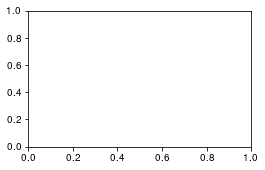

In [9]:
fig, axs = plt.subplots(figsize = figsize,
                        nrows = 1,
                        ncols = 1)

In [10]:
axs = [axs]

### Penta

In [11]:
penta_total = pd.concat([penta[k] for k in ('xp17', 'xp23')]).sort_index()

#### all heavy

In [12]:
penta['xp17'].columns

Index(['Old', 'New', 'h2'], dtype='object')

In [13]:
penta['xp17']['Old'].plot(
    ax = axs[0],
    linewidth = 0,
    marker = 's',
    color = '#ff3333',
    markeredgecolor = 'k',
    zorder = 5,
    markersize = markersize
)

In [14]:
penta['xp23']['Old'].plot(
    ax = axs[0],
    linewidth = 0,
    marker = 's',
    color = (1,1,1,0.7),
    markeredgecolor = '#ff3333',
    zorder = 5,
    markersize = markersize
)

In [15]:
from scipy.interpolate import UnivariateSpline
import numpy as np

In [16]:
import chaostools.fitting_hybrids as fh

In [17]:
spl = UnivariateSpline(penta_total.index, penta_total['Old'], s=100)

In [18]:
xint = np.linspace(0,100, 200)

In [19]:
popt, pcov = fh.decay_fit(penta_total.Old, 0.01)

In [20]:
#yint = spl(xint)

In [21]:
yint = fh.decay(*popt, xint)

In [22]:
axs[0].plot(
    xint,
    yint,
    linestyle = '--',
    color = '#ff3333',
    zorder = 1
)

#### all light

In [23]:
penta['xp17']['New'].plot(
    ax = axs[0],
    linewidth = 0,
    marker = 's',
    color = '#9933ff',
    markeredgecolor = 'k',
    zorder = 5,
    markersize = markersize
)

In [24]:
penta['xp23']['New'].plot(
    ax = axs[0],
    linewidth = 0,
    marker = 's',
    color = (1, 1, 1, 0.7),
    markeredgecolor = '#9933ff',
    zorder = 5,
    markersize = markersize
)

In [25]:
spl = UnivariateSpline(penta_total.index, penta_total['New'], s=100)

In [26]:
#yint = spl(xint)

In [27]:
axs[0].plot(
    xint,
    100-fh.decay(*popt, xint),
    linestyle = '--',
    color = '#9933ff',
    zorder = 1
)

### Layout

In [28]:
for ax in axs:
    for s in ('top', 'right'):
        ax.spines[s].set_visible(False)
    for label in ax.get_xticklabels():
        label.set_fontsize(labelsize_xy)
    for label in ax.get_yticklabels():
        label.set_fontsize(labelsize_xy)
    
    ax.minorticks_on()

In [29]:
xaxislabel = r'Time (min)'

In [30]:
yaxislabel = r'rel. abundance (\%)'

In [31]:
for ax in axs:
#     ax.set_title(title,
#                  horizontalalignment='left',
#                  x=0,
#                  y=1)
    ax.set_xlabel(xaxislabel, fontsize=labelsize_xy)
    ax.set_ylabel(yaxislabel, fontsize=labelsize_xy)

In [32]:
fig.tight_layout()

In [33]:
import pickle as pkl

In [34]:
fig.savefig('tc_m15_amp_penta_aggr_helvetica.svg')

In [108]:
# fig.savefig('fig6.png', dpi=300)